# <font color="#5fa8d3"> Check Photos

## <font color="#62b6cb"> 0. Libraries Importation & Funtions Definition

**Libraries Importation**

In [1]:
import json # to import jsons
import pandas as pd # to manipulate datasets
import numpy as np # to perform numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting nicer
from scipy.stats import gamma
import yaml # for importing a yaml file
from src.mymodule import * # for importing our functions

**Configuration Variables**

In [2]:
# Load the YAML file
with open('..\config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Function to set variables globally and store their names
def set_variables(config, prefix='', var_dict={}):
    for key, value in config.items():
        if isinstance(value, dict):
            set_variables(value, prefix + key + '_', var_dict)
        else:
            globals()[prefix + key] = value
            var_dict[prefix + key] = value
    return var_dict

# Set variables globally and get a dictionary of the set variables
set_vars = set_variables(config)

# Print all the variables that were set
print("Variables set from YAML file:")
for var_name, var_value in set_vars.items():
    print(f"{var_name}: {var_value}")

Variables set from YAML file:
seed: 123
train_annotations_json: annotations.json
train_path_original: ..\archive\image\image


## <font color="#62b6cb"> 1. Photo Checker

**Classes explanation**

* mat_bo_phan=lost parts (Miscellaneous Damage)
* rach=torn (Metal damage tear)
* mop_lom=dented (Metal damage dent)
* tray_son=paint scratches (Metal damage scratches)
* thung=puncture (Miscellaneous Damage)
* vo_kinh=broken glass (Glass damage crack)
* be_den= broken lamp (Miscellaneous Damage)

**New Classes explanation**

* mis_lost = lost parts (Miscellaneous Damage)
* met_tear = torn (Metal damage tear)
* met_scratch = paint scratches (Metal damage scratches)
* glass_crack = broken glass (Glass damage crack)
* mis_punct = puncture (Miscellaneous Damage)
* mis_lamp = broken lamp (Miscellaneous Damage)
* met_dent_minor = dented (Metal damage dent) - minor damage
* met_dent_medium = dented (Metal damage dent) - medium damage
* met_dent_severe = dented (Metal damage dent) - severe damage

In [3]:
# read JSON
with open(os.path.join(train_path_original, train_annotations_json  ), "r") as f:
    coco_data = json.load(f)

In [21]:
# we extract images with this damage type
class_name="met_dent"
data_class = extract_coco_data(coco_data, class_name)

In [22]:
data_class.keys()

dict_keys(['01012020_172204image853193.jpg', '01012020_172251image12370.jpg', '01022020_102909image891067.jpg', '01022020_103924image583913.jpg', '01092020_102550image198263.jpg', '01102020_110059image489580.jpg', '01102020_123100image371699.jpg', '01102020_135233image426549.jpg', '01102020_143031image489708.jpg', '01102020_143044image497560.jpg', '01102020_155809image270023.jpg', '01112020_083352image88938.jpg', '01122020_082948image895423.jpg', '02012020_082050image325584.jpg', '02012020_082055image352564.jpg', '02012020_082104image778950.jpg', '02012020_082109image750411.jpg', '02012020_082114image719022.jpg', '02012020_082149image286194.jpg', '02012020_082149image708972.jpg', '02012020_082149image828858.jpg', '02012020_082207image271452.jpg', '02012020_082207image848173.jpg', '02012020_082348image677767.jpg', '02012020_082358image759777.jpg', '02012020_083559image910979.jpg', '02012020_083638image298411.jpg', '02012020_083648image564788.jpg', '02012020_084042image591800.jpg', '0201

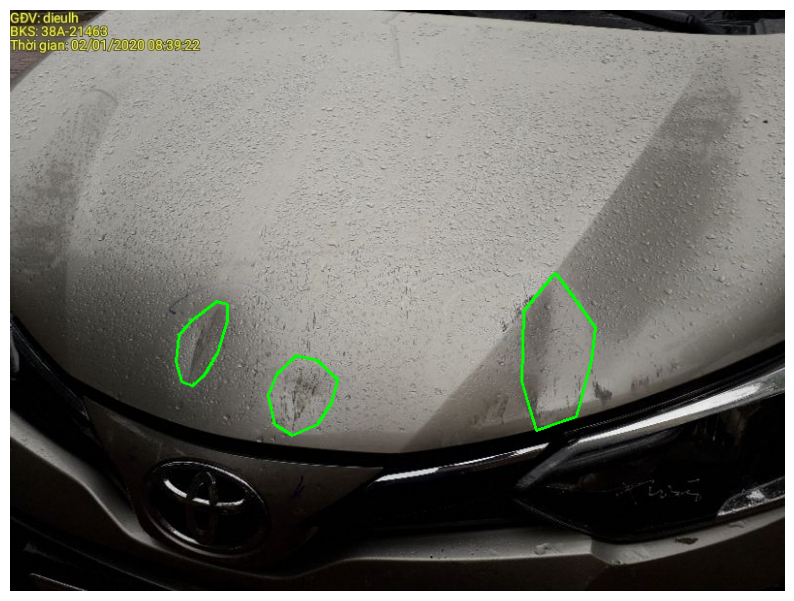

In [23]:
plot_photo_df(train_path_original,'02012020_084042image591800.jpg', data_class)